In [24]:
import pandas as pd

In [25]:
df_inv_item=pd.read_csv('Inventory_items.csv')

In [26]:
df_inv_item

,id,product_id,product_distribution_center_id,creation_date,creation_time,sold_date,sold_time,product_cost,product_retail_price,product_category,product_date,product_brand,product_department
0,174571,13844,7,2025-08-11,08:46:52,2025-09-18,04:50:52,2.77,6.99,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
1,174572,13844,7,2024-07-16,03:08:00,NaN,NaN,2.77,6.99,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
2,216419,13844,7,2023-09-04,19:33:12,2023-09-21,04:02:12,2.77,6.99,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
3,216420,13844,7,2024-02-16,00:15:00,NaN,NaN,2.77,6.99,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
4,216421,13844,7,2021-11-05,16:11:00,NaN,NaN,2.77,6.99,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...
489818,332010,25590,3,2020-11-05,04:42:00,NaN,NaN,10.39,24.00,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,Men
489819,467577,25590,3,2026-01-12,04:57:04,2026-02-10,15:08:04,10.39,24.00,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,Men
489820,467578,25590,3,2024-07-07,15:52:00,NaN,NaN,10.39,24.00,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,Men
489821,467579,25590,3,2024-03-21,16:36:00,NaN,NaN,10.39,24.00,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,Men


In [27]:
df_inv_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489823 entries, 0 to 489822
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              489823 non-null  int64  
 1   product_id                      489823 non-null  int64  
 2   product_distribution_center_id  489823 non-null  int64  
 3   creation_date                   489823 non-null  object 
 4   creation_time                   489823 non-null  object 
 5   sold_date                       181404 non-null  object 
 6   sold_time                       181404 non-null  object 
 7   product_cost                    489823 non-null  float64
 8   product_retail_price            489823 non-null  float64
 9   product_category                489823 non-null  object 
 10  product_date                    489782 non-null  object 
 11  product_brand                   489411 non-null  object 
 12  product_departme

In [28]:
df_check = df_inv_item[['product_id', 'creation_date','sold_date']]
df_check

,product_id,creation_date,sold_date
0,13844,2025-08-11,2025-09-18
1,13844,2024-07-16,NaN
2,13844,2023-09-04,2023-09-21
3,13844,2024-02-16,NaN
4,13844,2021-11-05,NaN
...,...,...,...
489818,25590,2020-11-05,NaN
489819,25590,2026-01-12,2026-02-10
489820,25590,2024-07-07,NaN
489821,25590,2024-03-21,NaN


In [29]:
df_check['creation_date'] = pd.to_datetime(df_check['creation_date'], errors='coerce')
df_check['sold_date'] = pd.to_datetime(df_check['sold_date'], errors='coerce')

C:\Users\matte\AppData\Local\Temp\ipykernel_17464\3758163726.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['creation_date'] = pd.to_datetime(df_check['creation_date'], errors='coerce')
C:\Users\matte\AppData\Local\Temp\ipykernel_17464\3758163726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_check['sold_date'] = pd.to_datetime(df_check['sold_date'], errors='coerce')


In [30]:
anomalie = []
for idx in df_check.index:
    if df_check.loc[idx, 'creation_date'] > df_check.loc[idx, 'sold_date']:
        anomalie.append(df_check.loc[idx, 'product_id'])
if len (anomalie)==0:
    print('non ci sono anomalie')
else:
         print('I prodotti con anomalie temporali sono:', anomalie)


non ci sono anomalie


In [31]:
anomalie_prezzi = []
for idx in df_inv_item.index:
    if df_inv_item.loc[idx, 'product_retail_price'] <= 0:
        anomalie_prezzi.append(df_inv_item.loc[idx, 'product_id'])

if len(anomalie_prezzi) == 0:
    print('Non ci sono anomalie sui prezzi')
else:
    print('I prodotti con anomalie sui prezzi sono:', anomalie_prezzi)

Non ci sono anomalie sui prezzi


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

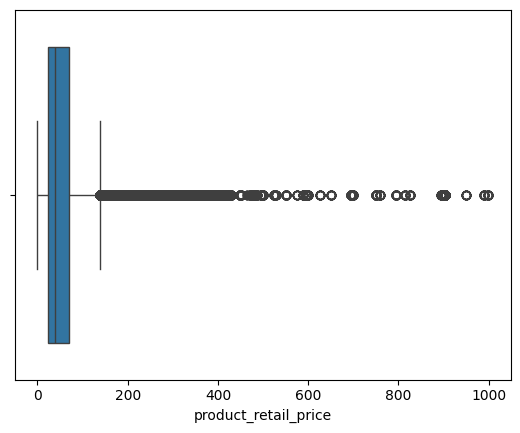

In [34]:
sns.boxplot(x='product_retail_price', data=df_inv_item)
plt.show()

In [36]:
df_inv_item = df_inv_item.rename(columns={'product_date': 'product_name'})

In [38]:
df_inv_item['product_retail_price'].sort_values(ascending=False)

210537    999.00
210538    999.00
210539    999.00
210540    999.00
210541    999.00
           ...  
10421       0.02
10423       0.02
10422       0.02
10425       0.02
10424       0.02
Name: product_retail_price, Length: 489823, dtype: float64

In [41]:
df_inv_item[['product_name', 'product_category', 'product_retail_price']].sort_values(by='product_retail_price', ascending=False).head(10)

,product_name,product_category,product_retail_price
210537,Darla,Outerwear & Coats,999.0
210538,Darla,Outerwear & Coats,999.0
210539,Darla,Outerwear & Coats,999.0
210540,Darla,Outerwear & Coats,999.0
210541,Darla,Outerwear & Coats,999.0
210542,Darla,Outerwear & Coats,999.0
210530,Darla,Outerwear & Coats,999.0
210531,Darla,Outerwear & Coats,999.0
210532,Darla,Outerwear & Coats,999.0
210533,Darla,Outerwear & Coats,999.0


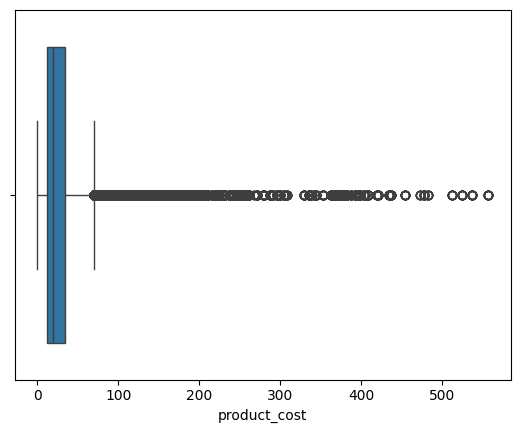

In [42]:
sns.boxplot(x='product_cost', data=df_inv_item)
plt.show()

In [43]:
df_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489823 entries, 0 to 489822
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   product_id     489823 non-null  int64         
 1   creation_date  489823 non-null  datetime64[ns]
 2   sold_date      181404 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 11.2 MB


In [44]:
df_inv_item['product_category'].unique()

array(['Accessories', 'Active', 'Blazers & Jackets', 'Clothing Sets',
       'Dresses', 'Fashion Hoodies & Sweatshirts', 'Intimates', 'Jeans',
       'Jumpsuits & Rompers', 'Leggings', 'Maternity',
       'Outerwear & Coats', 'Pants', 'Pants & Capris', 'Plus', 'Shorts',
       'Skirts', 'Sleep & Lounge', 'Socks', 'Socks & Hosiery', 'Suits',
       'Suits & Sport Coats', 'Sweaters', 'Swim', 'Tops & Tees',
       'Underwear'], dtype=object)

In [49]:
categorie=[df_inv_item['product_category'].unique]

In [59]:
outliers = []

for cat in categorie:
    df_cat = df_inv_item[df_inv_item['product_category'] == cat]
    Q1 = df_cat['product_retail_price'].quantile(0.25)
    Q3 = df_cat['product_retail_price'].quantile(0.75)
    IQR = Q3 - Q1
    limite_alto = Q3 + 1.5 * IQR
    limite_basso = Q1 - 1.5 * IQR
    out_cat = df_cat[(df_cat['product_retail_price'] > limite_alto) | 
                     (df_cat['product_retail_price'] < limite_basso)]
    outliers.append(out_cat)

df_outliers_price = pd.concat(outliers)
print("Outliers prezzi retail: {len(df_outliers_price)}")
print(df_outliers_price[['product_name', 'product_retail_price', 'product_category']])




Outliers prezzi retail: {len(df_outliers_price)}
Empty DataFrame
Columns: [product_name, product_retail_price, product_category]
Index: []


In [60]:
outliers_cost = []

for cat in categorie:
    df_cat = df_inv_item[df_inv_item['product_category'] == cat]
    Q1 = df_cat['product_cost'].quantile(0.25)
    Q3 = df_cat['product_cost'].quantile(0.75)
    IQR = Q3 - Q1
    limite_alto = Q3 + 1.5 * IQR
    limite_basso = Q1 - 1.5 * IQR
    
    # Outlier sia alti che bassi
    out_cat = df_cat[(df_cat['product_cost'] > limite_alto) | 
                     (df_cat['product_cost'] < limite_basso)]
    outliers_cost.append(out_cat)

df_outliers_cost = pd.concat(outliers_cost)
print(f"\nOutliers costi: {len(df_outliers_cost)}")
print(df_outliers_cost[['product_name', 'product_cost', 'product_category']])


Outliers costi: 0
Empty DataFrame
Columns: [product_name, product_cost, product_category]
Index: []


In [56]:
df_inv_item['product_retail_price'].max()

np.float64(999.0)

In [47]:
stats_per_categoria = df_inv_item.groupby('product_category')['product_retail_price'].describe()
stats_per_categoria

,count,mean,std,min,25%,50%,75%,max
product_category,,,,,,,,
Accessories,26684.0,42.992308,49.310619,0.02,12.99,24.44,49.00,299.00
Active,24579.0,50.689686,75.555596,1.95,22.00,34.00,55.00,903.00
Blazers & Jackets,8372.0,91.252979,90.614162,7.68,18.90,59.99,130.00,698.00
Clothing Sets,532.0,86.890282,43.317702,19.99,57.99,70.00,109.99,199.95
Dresses,14510.0,85.754567,84.332248,7.99,32.99,59.00,108.00,498.00
Fashion Hoodies & Sweatshirts,32017.0,54.457790,37.134630,8.88,34.99,49.95,64.99,903.00
Intimates,36128.0,33.499960,28.509458,1.75,16.31,27.99,42.00,903.00
Jeans,34956.0,98.456888,63.406773,9.99,46.07,79.00,142.95,389.00
Jumpsuits & Rompers,2474.0,41.891653,58.025310,8.74,12.23,23.00,47.99,550.00


In [62]:
outerwear = df_inv_item[df_inv_item['product_category'] == 'Outerwear & Coats']
print(f"\nPrezzi = 999.00€: {len(outerwear[outerwear['product_retail_price'] == 999])}")
print(f"Prezzi >= 500€: {len(outerwear[outerwear['product_retail_price'] >= 500])}")
print(f"Prezzi < 20€: {len(outerwear[outerwear['product_retail_price'] < 20])}")


Prezzi = 999.00€: 26
Prezzi >= 500€: 751
Prezzi < 20€: 316


In [66]:
prodotti_prezzobasso= outerwear[outerwear['product_retail_price'] < 20]
prodotti_prezzobasso

,id,product_id,product_distribution_center_id,creation_date,creation_time,sold_date,sold_time,product_cost,product_retail_price,product_category,product_name,product_brand,product_department
202762,100554,23776,1,2024-02-23,07:31:22,2024-03-08,08:35:22,8.11,17.99,Outerwear & Coats,Alki'i Mens 1/4-Zip Lightweight Performance Mi...,Alki'i,Men
202763,100555,23776,1,2023-12-25,00:26:00,NaN,NaN,8.11,17.99,Outerwear & Coats,Alki'i Mens 1/4-Zip Lightweight Performance Mi...,Alki'i,Men
202764,191893,23776,1,2026-01-01,19:38:27,2026-02-11,06:37:27,8.11,17.99,Outerwear & Coats,Alki'i Mens 1/4-Zip Lightweight Performance Mi...,Alki'i,Men
202765,191894,23776,1,2022-01-19,13:16:00,NaN,NaN,8.11,17.99,Outerwear & Coats,Alki'i Mens 1/4-Zip Lightweight Performance Mi...,Alki'i,Men
202766,226237,23776,1,2026-01-22,01:08:18,2026-01-22,07:31:18,8.11,17.99,Outerwear & Coats,Alki'i Mens 1/4-Zip Lightweight Performance Mi...,Alki'i,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...
222561,371459,8807,7,2023-03-31,12:27:00,NaN,NaN,6.55,15.00,Outerwear & Coats,TREASURE ROCK Quilted Jacket W/ Puff Collar [T...,TREASURE ROCK,Women
222562,406553,8807,7,2022-02-16,03:34:04,2022-03-15,20:07:04,6.55,15.00,Outerwear & Coats,TREASURE ROCK Quilted Jacket W/ Puff Collar [T...,TREASURE ROCK,Women
222563,406554,8807,7,2020-10-23,09:34:00,NaN,NaN,6.55,15.00,Outerwear & Coats,TREASURE ROCK Quilted Jacket W/ Puff Collar [T...,TREASURE ROCK,Women
222564,476688,8807,7,2024-05-29,01:13:17,2024-06-22,12:55:17,6.55,15.00,Outerwear & Coats,TREASURE ROCK Quilted Jacket W/ Puff Collar [T...,TREASURE ROCK,Women
